## 1st base vs 3rd base seating section analysis
Comparing revenue from seating sections behind 1st base and 3rd base:
- Generally across all games
- General games vs Subway Series
- General games vs Dodgers games

In [74]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
print("Libraries imported successfully.")

# file paths
data_path = os.path.expanduser("~/Documents/Mets/Data/")
print("File path defined successfully.")

# load data
df = pd.read_csv(data_path + "updated_analysis_2024 season mets transactions_05-22_11am.csv")
print("2024 Mets season data loaded successfully.")

Libraries imported successfully.
File path defined successfully.
2024 Mets season data loaded successfully.


In [75]:
# inspect data
df.head()
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26474 entries, 0 to 26473
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   section              26474 non-null  object
 1   event_date           26474 non-null  object
 2   name                 26474 non-null  object
 3   revenue_per_section  26474 non-null  object
 4   event_category       26474 non-null  object
 5   stadium_side         26314 non-null  object
 6   ring_pos             26314 non-null  object
 7   seat_count           26474 non-null  object
 8   revenue_per_seat     26474 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


,section,event_date,name,revenue_per_section,event_category,stadium_side,ring_pos,seat_count,revenue_per_seat
count,26474,26474,26474,26474,26474,26314,26314,26474,26474
unique,241,80,72,15086,4,3,2,93,8100
top,110,2024-03-29 17:40:00+00,BRAVES at METS,0.00,Classic,outfield side,everything else,58,0.00
freq,156,409,1600,505,14446,10808,16786,3545,505


In [73]:
# convert event_date
df['event_date'] = pd.to_datetime(df['event_date'])
column_names = list(df.columns)
print(f"{column_names[1]} field converted to data type: date")
df.info()

event_date field converted to data type: date
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26474 entries, 0 to 26473
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   section              26474 non-null  object             
 1   event_date           26474 non-null  datetime64[ns, UTC]
 2   name                 26474 non-null  object             
 3   revenue_per_section  10389 non-null  float64            
 4   event_category       26474 non-null  object             
 5   stadium_side         26474 non-null  object             
 6   ring_pos             26474 non-null  object             
 7   seat_count           26474 non-null  object             
 8   revenue_per_seat     26353 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 1.8+ MB


In [76]:
# Convert revenue_per_seat and stadium_side
df['revenue_per_seat'] = pd.to_numeric(df['revenue_per_seat'], errors='coerce')
df['revenue_per_section'] = pd.to_numeric(df['revenue_per_section'], errors='coerce')
df['stadium_side'] = df['stadium_side'].astype(str) 
df['ring_pos'] = df['ring_pos'].astype(str) 
print(f"{column_names[3]} and {column_names[8]} fields converted to data type: float")
print(f"{column_names[5]} and {column_names[6]} fields converted to data type: str")
df.info()

revenue_per_section and revenue_per_seat fields converted to data type: float
stadium_side and ring_pos fields converted to data type: str
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26474 entries, 0 to 26473
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   section              26474 non-null  object 
 1   event_date           26474 non-null  object 
 2   name                 26474 non-null  object 
 3   revenue_per_section  10389 non-null  float64
 4   event_category       26474 non-null  object 
 5   stadium_side         26474 non-null  object 
 6   ring_pos             26474 non-null  object 
 7   seat_count           26474 non-null  object 
 8   revenue_per_seat     26353 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.8+ MB


In [77]:
# remove 

In [78]:
# define NY Mets color scheme
mets_blue = '#002D72' 
mets_orange = '#FF5910' 

/var/folders/k8/z16d__ts06zdqf1hhm0qj9lw0000gn/T/ipykernel_29340/334308807.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FF5910'` for the same effect.

  sns.swarmplot(x='event_category', y='revenue_per_seat', hue='stadium_side', data=grouped_df,


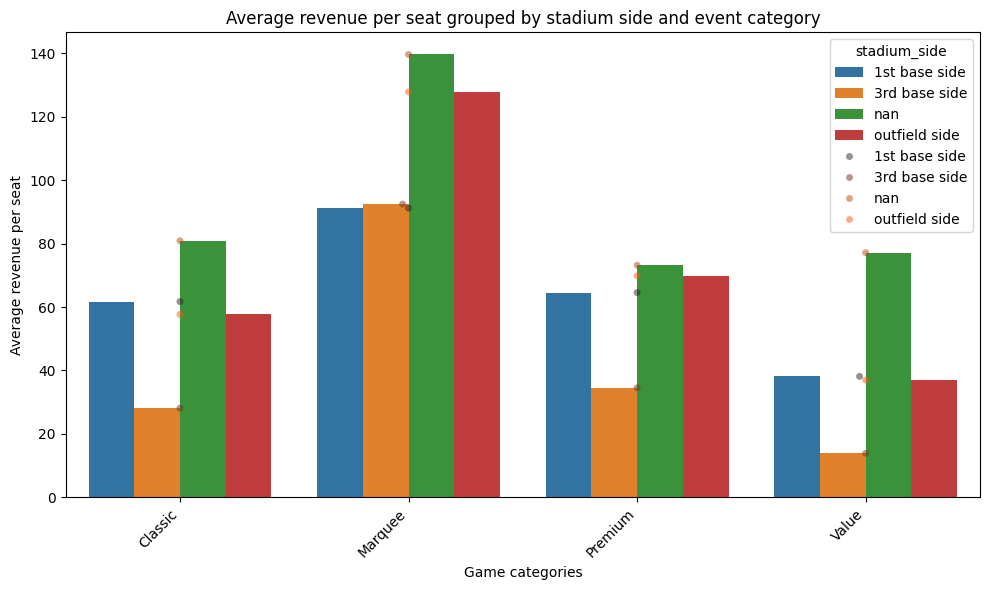

In [82]:
### plot average revenue per seat per section grouped by stadium side and event category

# group by event_category and stadium_side, then calculate the average revenue_per_seat
grouped_df = df.groupby(['event_category', 'stadium_side'])['revenue_per_seat'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(x='event_category', y='revenue_per_seat', hue='stadium_side', data=grouped_df,
            #order=[DEFINE_ORDER_HERE],
            err_kws={'linewidth': 1.2, 'color': '#993414'}, errorbar = 'sd', capsize=0.2,
            #color=mets_blue
            )

# Swarm plot
#sns.swarmplot(x='event_category', y='revenue_per_seat', hue='stadium_side', data=grouped_df,
              #order=[DEFINE_ORDER_HERE],
#              color = mets_orange,
#              alpha = .5)

# Set plot labels and title
plt.xlabel('Game categories')
plt.ylabel('Average revenue per seat')
plt.title('Average revenue per seat grouped by stadium side and event category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Format y axis ticks for readability
#plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000])

# Display the plot
plt.tight_layout()
plt.show()

- look at Subway series
- Look at Dodgers
- add error bars
- remove nan
- look at specifically sections: 
    - 3rd base side: 121 - 126
    - 1st base side: 109 - 114
